In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
import pandas as pd

# 데이터 파일 경로 설정
file_path = "./seeds_dataset.txt"

# 데이터 파일 읽기
column_names = ['Area', 'Perimeter', 'Compactness', 'Length of kernel', 'Width of kernel', 'Asymmetry coefficient', 'Length of kernel groove', 'Class']
df = pd.read_csv(file_path, sep='\t', header=None, names=column_names)

df

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [50]:
# 결측치 확인
df.isnull().sum()

Area                       0
Perimeter                  0
Compactness                0
Length of kernel           0
Width of kernel            0
Asymmetry coefficient      0
Length of kernel groove    0
Class                      0
dtype: int64

In [51]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Area                       0
Perimeter                  0
Compactness                0
Length of kernel           0
Width of kernel            0
Asymmetry coefficient      0
Length of kernel groove    0
Class                      0
dtype: int64

Text(0, 0.5, 'Count')

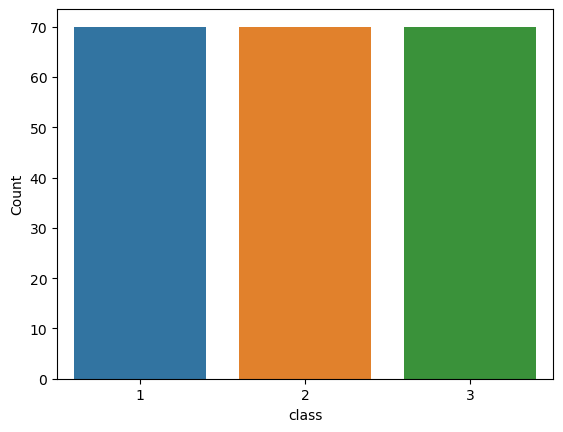

In [52]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Class")
plt.xlabel("class")
plt.ylabel("Count")

In [54]:
df.columns

Index(['Area', 'Perimeter', 'Compactness', 'Length of kernel',
       'Width of kernel', 'Asymmetry coefficient', 'Length of kernel groove',
       'Class'],
      dtype='object')

In [55]:
X=df.drop('Class', axis=1)

X.head()
# head()는 첫 5행만 출력함.

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [56]:
y=df['Class']
y.value_counts()

Class
1    70
2    70
3    70
Name: count, dtype: int64

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# random_state는 데이터를 무작위로 나누거나 섞을 때 사용되는 난수 발생기의 시드(seed) 값

X_train

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove
104,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
141,13.32,13.94,0.8613,5.541,3.073,7.035,5.440
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
74,16.82,15.51,0.8786,6.017,3.486,4.004,5.841
136,17.36,15.76,0.8785,6.145,3.574,3.526,5.971
...,...,...,...,...,...,...,...
67,14.01,14.29,0.8625,5.609,3.158,2.217,5.132
192,11.87,13.02,0.8795,5.132,2.953,3.597,5.132
117,19.15,16.45,0.8890,6.245,3.815,3.084,6.185
47,14.99,14.56,0.8883,5.570,3.377,2.958,5.175


In [67]:
# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print ('Accuracy: {:.5f}'.format(accuracy_score(y_test, pred_dt)))
print ('Confusion Matrix:\n', confusion_matrix(y_test, pred_dt))
print('Classification Report:\n', classification_report(y_test,pred_dt))


--- Decision Tree Classifier ---
Accuracy: 0.95238
Confusion Matrix:
 [[13  0  0]
 [ 2 14  0]
 [ 0  0 13]]
Classification Report:
               precision    recall  f1-score   support

           1       0.87      1.00      0.93        13
           2       1.00      0.88      0.93        16
           3       1.00      1.00      1.00        13

    accuracy                           0.95        42
   macro avg       0.96      0.96      0.95        42
weighted avg       0.96      0.95      0.95        42



In [71]:
# 랜덤 포레스트 분류기 생성 및 학습
clf_rf = RandomForestClassifier(n_estimators=100, random_state=0)
clf_rf.fit(X_train, y_train)

# 테스트 세트로 예측
pred_rf = clf_rf.predict(X_test)

# 결과 출력
print("\n--- Random Forest Classifier ---")
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, pred_rf)))
print('Confusion Matrix:\n', confusion_matrix(y_test, pred_rf))
print('Classification Report:\n', classification_report(y_test, pred_rf))


--- Random Forest Classifier ---
Accuracy: 0.95238
Confusion Matrix:
 [[13  0  0]
 [ 2 14  0]
 [ 0  0 13]]
Classification Report:
               precision    recall  f1-score   support

           1       0.87      1.00      0.93        13
           2       1.00      0.88      0.93        16
           3       1.00      1.00      1.00        13

    accuracy                           0.95        42
   macro avg       0.96      0.96      0.95        42
weighted avg       0.96      0.95      0.95        42



In [70]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print ('Accuracy: {:.5f}'.format(accuracy_score(y_test, pred_nn)))
print ('Confusion Matrix:\n', confusion_matrix(y_test, pred_nn))
print('Classification Report:\n', classification_report(y_test,pred_nn))


--- Neural Network Classifier ---
Accuracy: 0.88095
Confusion Matrix:
 [[11  1  1]
 [ 2 13  1]
 [ 0  0 13]]
Classification Report:
               precision    recall  f1-score   support

           1       0.85      0.85      0.85        13
           2       0.93      0.81      0.87        16
           3       0.87      1.00      0.93        13

    accuracy                           0.88        42
   macro avg       0.88      0.89      0.88        42
weighted avg       0.88      0.88      0.88        42



C:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [69]:
model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ly_preds = model.predict(X_test)
mse = mean_squared_error(ly_preds, y_test)
print('평균제곱오차_1', mse)

평균제곱오차_1 0.10513096161958616
